In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure, morphology

from matplotlib.pyplot import imread
from skimage.morphology import binary_dilation

np.set_printoptions(precision = 2)
np.set_printoptions(suppress  = True)

In [37]:
def normalize(img):
    img_copy  = img.copy()
    img_copy  = img_copy.astype('float64') 
    img_min   = np.min(img_copy)
    img_max   = np.max(img_copy)
    img_copy  = (img_copy - img_min)/(img_max - img_min)
    return img_copy

def create_circle_filter(N1, N2, R):
    n1   = np.linspace(-N1/2, N1/2, N1, dtype = 'float64')
    n2   = np.linspace(-N2/2, N2/2, N2, dtype = 'float64')
    n1, n2 = np.meshgrid(n1, n2)
    img  = (np.sqrt((n1/R)**2 + (n2/R)**2) <= 1)
    img  = img.astype('float64')
    return img

def convert_8bits(img):
    img_copy  = normalize(img)
    img_copy  = np.round(255*img_copy).astype('uint8')
    return img_copy

In [12]:
mask    = imread('multi_recorte_2.png')[:,:,0]
mask    = convert_8bits(mask)
krnl    = create_circle_filter(15, 15, 5)
mask_2  = binary_dilation(mask, krnl)
mask_2  = convert_8bits(mask_2)
edge    = mask_2 - mask

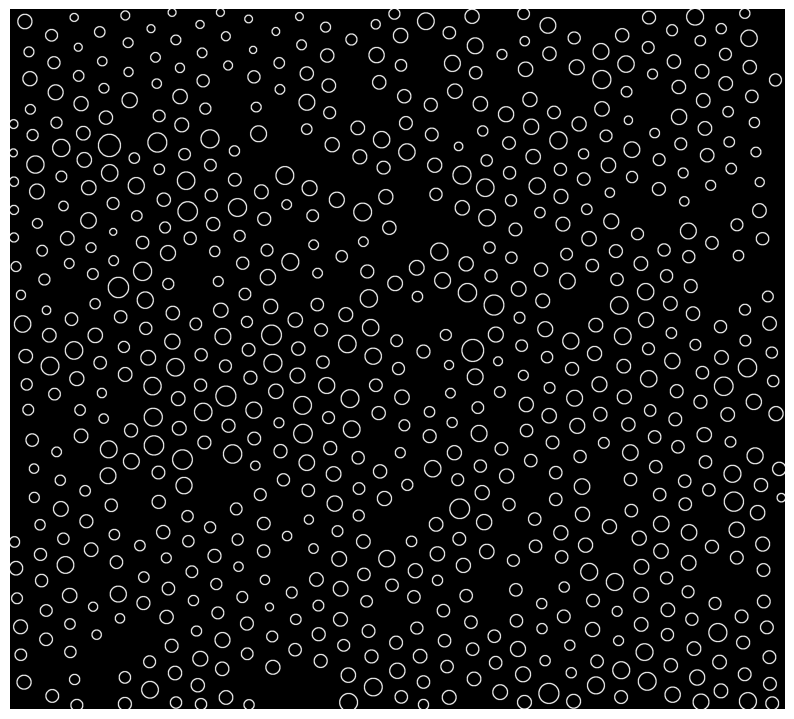

In [13]:
fig, axs = plt.subplots(figsize = (10,10))
axs.imshow(edge, cmap = 'gray')
axs.axis('off')
plt.show()

In [55]:
# Convert to 8 bits image
edge_thresh = convert_8bits(edge)

# Close open circle countours
edge_thresh = morphology.closing(edge_thresh, morphology.square(5))

# Find countours
contours = measure.find_contours(edge_thresh, level=0.8)

# Count closed contours
#closed_contours = [contour for contour in contours if np.allclose(contour[0], contour[-1])]

# Print the number of closed contours
print(f'Number of closed contours: {len(contours)/2}')


Number of closed contours: 667.0
